In [181]:
#importing all packages we need 
import numpy as np
import pandas as pd 
from  sklearn.ensemble import VotingClassifier as vote
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense as dense 
from tensorflow.keras.models import Sequential 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score ,recall_score,precision_score 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier



In [182]:
#read train and test data from csv files 
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [183]:
#explotary data anaylsis 
print(train.head())
print(train.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [184]:
#cleaning data 
print(train.Cabin.value_counts())
print("in this columns theres is high cardinality so we don't need it because it doesn't give us much information")
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)



B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
in this columns theres is high cardinality so we don't need it because it doesn't give us much information


In [185]:
#other feature selection we can remove is id because it is unique for every person
train.drop("PassengerId",axis=1,inplace=True)
test.drop("PassengerId",axis=1,inplace=True)

In [186]:
#we can see the missing value again
print(train["Ticket"].value_counts())
print("there is also high cardinality here so it doesn't give us important information and ticket types does't matter also")
train.drop("Ticket",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
there is also high cardinality here so it doesn't give us important information and ticket types does't matter also


In [187]:
print(train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


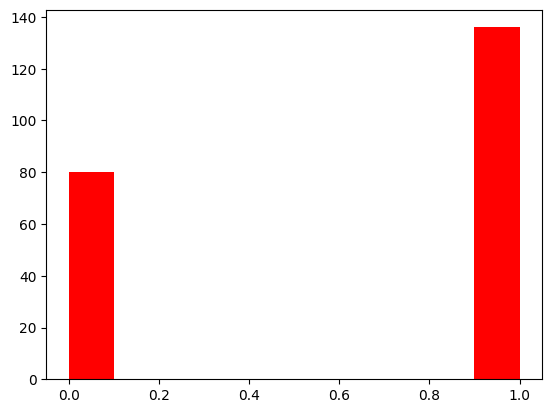

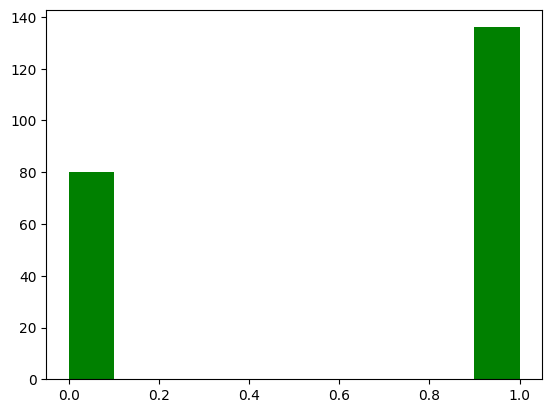

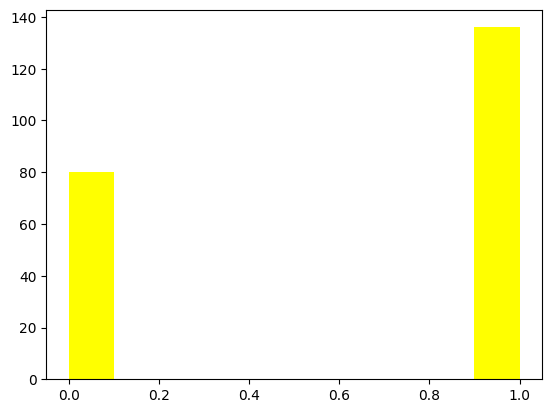

In [188]:
#visualization show us how pclass feature matters 
plt.hist(train[train["Pclass"]==1]["Survived"],color="red")
plt.show()
plt.hist(train[train["Pclass"]==1]["Survived"],color="green")
plt.show()
plt.hist(train[train["Pclass"]==1]['Survived'],color="yellow")
plt.show()

In [189]:
#there is some feature here we can extract from we the job title from name 
print(train.Name)
print('the job title is after comma directly so we can get it using split method ')
def get_job(a):
  return (a.split(',')[1]).split(' ')[1].split('.')[0]
train["job"]=train["Name"].apply(get_job)
test["job"]=train["Name"].apply(get_job)



0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
the job title is after comma directly so we can get it using split method 


In [190]:
print(train.job.value_counts().sort_values(ascending=False))
print(test.job.value_counts().sort_values(ascending=False))
print("we do some cleaning here so any job other the most 6 important job we put it as other  ")
def edit_job(a):
  if(a not in ["Mr",'Miss','Mrs',"Master","Dr","Rev"]):
    return 'other'
  else:
    return a 
train['job']=train['job'].apply(edit_job)
test['job']=test.job.apply(edit_job)    
print(test.job.value_counts())
print(train.job.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: job, dtype: int64
Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: job, dtype: int64
we do some cleaning here so any job other the most 6 important job we put it as other  
Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
other       2
Name: job, dtype: int64
Mr        517
Miss      182
Mrs       125
Master     40
other      14
Dr          7
Rev         6
Name: job, dtype: int64


In [191]:
#we can remove name do we don't need it 
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

In [192]:
print(train.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'job'],
      dtype='object')


In [193]:
#other feature extraction is on sibsp ,parch 
#parch refers to parents or childeren where person had aboard the ship 
#sibsp refers to siblings which is sister or brother and spouses refers to wife or husband 
print('so we can know the number of family members\n so we create other feature is sum of two sibsp and parch if value 0 mean he is alone')

so we can know the number of family members
 so we create other feature is sum of two sibsp and parch if value 0 mean he is alone


In [194]:
train["family_size"]=train.SibSp+train.Parch
test["family_size"]=test.SibSp+test.Parch



In [195]:
#we can remove the two feature 
train.drop(['Parch',"SibSp"],axis=1,inplace=True)
test.drop(["Parch","SibSp"],axis=1,inplace=True)

In [196]:
print(train.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'job',
       'family_size'],
      dtype='object')


In [197]:
#first thing we must split the feature and target from train dataframe and drop it 
y=train.Survived
train.drop("Survived",axis=1,inplace=True)


28.0
29.69911764705882


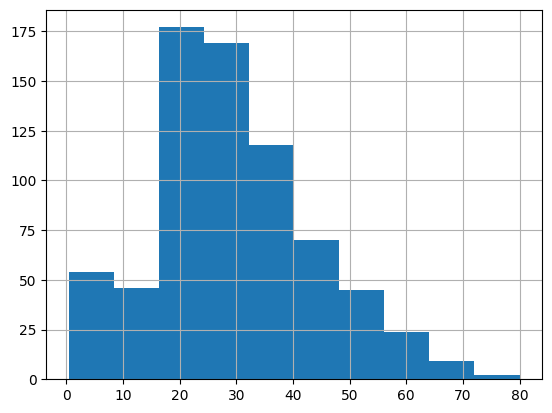

they are very similiar to each other so we use mean


In [198]:
#we need to fillvalue the missing value of the age by median or mean according to histgram 
train.Age.hist()
print(train.Age.median())
print(train.Age.mean())
plt.show()
print('they are very similiar to each other so we use mean')


In [199]:
from sklearn.impute import SimpleImputer as imputer 
imputer1=imputer(strategy='mean')
train['Age']=imputer1.fit_transform(train[['Age']])
test["Age"]=imputer1.transform(test[["Age"]])



In [200]:
test.Fare.fillna(np.mean(train["Fare"]),inplace=True)
train.Embarked.fillna("S",inplace=True)

In [201]:
train.dtypes

Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
job             object
family_size      int64
dtype: object

In [202]:
print(train.isna().sum())
print(test.isna().sum())

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
job            0
family_size    0
dtype: int64
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
job            0
family_size    0
dtype: int64


In [203]:
#know data is cleaned we must use encoding 
train_new=pd.get_dummies(train)
test_new=pd.get_dummies(test)

In [204]:
print(train_new.columns)
print(test_new.columns)

Index(['Pclass', 'Age', 'Fare', 'family_size', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'job_Dr', 'job_Master',
       'job_Miss', 'job_Mr', 'job_Mrs', 'job_Rev', 'job_other'],
      dtype='object')
Index(['Pclass', 'Age', 'Fare', 'family_size', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'job_Dr', 'job_Master',
       'job_Miss', 'job_Mr', 'job_Mrs', 'job_Rev', 'job_other'],
      dtype='object')


In [205]:
#split data into train ,dev set 
x_train,x_test,y_train,y_test=train_test_split(train_new,y,test_size=.2,shuffle=True)


In [206]:
model1=RandomForestClassifier(max_depth=4, max_features=6, min_samples_leaf=10,
                       n_estimators=400)
model3=SVC(degree=8,kernel='poly',probability=True)
model4= KNeighborsClassifier(n_neighbors=30)

  

In [207]:
model=vote(estimators=[('rf', model1),('knn',model4), ('svc',model3)], voting='soft')

In [208]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=4,
                                                     max_features=6,
                                                     min_samples_leaf=10,
                                                     n_estimators=400)),
                             ('knn', KNeighborsClassifier(n_neighbors=30)),
                             ('svc',
                              SVC(degree=8, kernel='poly', probability=True))],
                 voting='soft')

In [209]:
pred_train=model.predict(x_train)
print(f"the accuracy of the classifier on training data is {accuracy_score(y_train,pred_train)}")

the accuracy of the classifier on training data is 0.8216292134831461


In [210]:
pred_test=model.predict(x_test)
print(f"the accuracy of the classifier on training data is {accuracy_score(y_test,pred_test)}")


the accuracy of the classifier on training data is 0.776536312849162


In [219]:
#nn model 
def create_model():
  model2=Sequential()
  model2.add(dense(100,activation="relu",input_shape=(train_new.shape[1],)))
  model2.add(dense(60,activation='relu'))
  model2.add(dense(30,activation="relu"))
  model2.add(dense(1,activation="sigmoid"))
  model2.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])
  return model2
model2 = KerasClassifier(build_fn=create_model, epochs=120, batch_size=100)
model2.fit(x_train,y_train)
pred_train_nn=model2.predict(x_train)

Epoch 1/120


<ipython-input-219-513ecc0557ff>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model, epochs=120, batch_size=100)


8/8 [==============================] - 1s 3ms/step - loss: 0.7376 - accuracy: 0.6194
Epoch 2/120
8/8 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6643
Epoch 3/120
8/8 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.7079
Epoch 4/120
8/8 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.6728
Epoch 5/120
8/8 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.6938
Epoch 6/120
8/8 [==============================] - 0s 3ms/step - loss: 0.5566 - accuracy: 0.7556
Epoch 7/120
8/8 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7331
Epoch 8/120
8/8 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.7711
Epoch 9/120
8/8 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7402
Epoch 10/120
8/8 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7963
Epoch 11/120
8/8 [=======================

In [220]:
pred_train=model2.predict(x_train)
print(f"the accuracy of the neural network on training data is {accuracy_score(y_train,pred_train)}")

23/23 [==============================] - 0s 1ms/step
the accuracy of the neural network on training data is 0.8539325842696629


In [221]:
pred_test=model2.predict(x_test)
print(f"the accuracy of the neural network classifier  on test data is {accuracy_score(y_test,pred_test)}")


6/6 [==============================] - 0s 4ms/step
the accuracy of the neural network classifier  on test data is 0.7988826815642458


In [222]:
print("it seems that neural network model is best than voting  model ")


it seems that neural network model is best than voting  model 
